In [14]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from VQLS import  estimateNorm
from LSSVM import predict, accuracy, linearKernel
from VQLSSVM import VQLSSVM

In [15]:
shots: int = 10000
gamma: float = 0.01 # regularization parameter
testSize: float = 0.2
subsetSize: int = 7
classToFilterOut: int = 2

In [16]:
vqlssvm: VQLSSVM = VQLSSVM(gamma, shots)

In [17]:
# X, y = datasets.make_classification( # dummy data
#     n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=45
# )
X,y = datasets.load_iris(return_X_y=True)
X = X[y!=classToFilterOut]
y = y[y!=classToFilterOut]

y: np.array = np.where(y == 0, -1, 1)
xTrain, xTest, yTrain, yTest = train_test_split(
    X, y, test_size=0.93, random_state=42 # 7 samples for training
)
subsetIndices  = np.random.choice(np.arange(xTrain.shape[0]), subsetSize, replace=False)
xSubset = np.array([xTrain[i] for i in subsetIndices])
ySubset = np.array([yTrain[i] for i in subsetIndices])

LS-SVM Matrix: [[  0.     1.     1.     1.     1.     1.     1.     1.  ]
 [  1.   157.84  65.24  49.08  57.7   60.22  47.2   49.4 ]
 [  1.    65.24 173.7   55.62  65.11  67.95  53.39  55.65]
 [  1.    49.08  55.62 151.12  49.36  51.64  47.    41.4 ]
 [  1.    57.7   65.11  49.36 157.58  60.1   47.37  49.25]
 [  1.    60.22  67.95  51.64  60.1  162.74  49.52  51.4 ]
 [  1.    47.2   53.39  47.    47.37  49.52 143.65  39.95]
 [  1.    49.4   55.65  41.4   49.25  51.4   39.95 142.25]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(136.11+0j), (39.1675+0j), (-17.377500000000005+0j), (37.2125+0j), (41.2525+0j), (-13.027499999999996+0j), (16.127499999999998+0j), (-16.57+0j), (-8.6175+0j), (-23.37250000000001+0j), (39.0025+0j), (40.337500000000006+0j), (-11.8

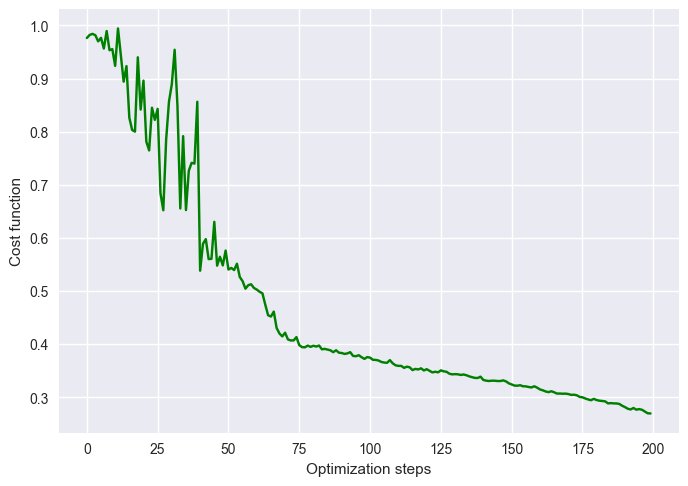

In [18]:
vqlssvm.train(xSubset, ySubset, quantumSimulation=False, verbose=True, iterations = 200)

vqlssvm.plotCost()

In [19]:
print(vqlssvm.predict(xTest))

[ 0.31228943+0.j  0.23607965+0.j  0.2723306 +0.j -0.02398424+0.j
 -0.01751654+0.j -0.03626153+0.j -0.08435384+0.j  0.21075853+0.j
 -0.04915225+0.j -0.04841244+0.j -0.03502593+0.j -0.01563103+0.j
  0.26617257+0.j -0.07883348+0.j  0.25109013+0.j -0.05293781+0.j
  0.28014238+0.j  0.29483106+0.j -0.02941466+0.j -0.03048842+0.j
  0.25295131+0.j  0.21305569+0.j -0.02320556+0.j -0.04371842+0.j
  0.2142014 +0.j -0.07425709+0.j -0.05355124+0.j  0.22532084+0.j
 -0.02597179+0.j  0.30325963+0.j -0.02886444+0.j -0.03575018+0.j
  0.23497281+0.j -0.04388707+0.j  0.17318442+0.j -0.03706455+0.j
  0.24944522+0.j  0.23583563+0.j -0.05077281+0.j -0.06802365+0.j
 -0.0397044 +0.j -0.02325658+0.j -0.03637576+0.j  0.21819449+0.j
 -0.04055843+0.j -0.05119086+0.j  0.20030355+0.j -0.01099143+0.j
  0.2329163 +0.j -0.05320514+0.j -0.00564511+0.j -0.02359927+0.j
 -0.04569723+0.j -0.03489614+0.j -0.02274523+0.j  0.25431328+0.j
 -0.04185724+0.j  0.17876794+0.j -0.0556953 +0.j  0.22725737+0.j
  0.25520619+0.j  0.22199

In [20]:
 print("Accuracy:",vqlssvm.accuracy(xTest, yTest))

Accuracy: 1.0


LS-SVM Matrix: [[  0.     1.     1.     1.     1.     1.     1.     1.  ]
 [  1.   157.84  65.24  49.08  57.7   60.22  47.2   49.4 ]
 [  1.    65.24 173.7   55.62  65.11  67.95  53.39  55.65]
 [  1.    49.08  55.62 151.12  49.36  51.64  47.    41.4 ]
 [  1.    57.7   65.11  49.36 157.58  60.1   47.37  49.25]
 [  1.    60.22  67.95  51.64  60.1  162.74  49.52  51.4 ]
 [  1.    47.2   53.39  47.    47.37  49.52 143.65  39.95]
 [  1.    49.4   55.65  41.4   49.25  51.4   39.95 142.25]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(136.11+0j), (39.1675+0j), (-17.377500000000005+0j), (37.2125+0j), (41.2525+0j), (-13.027499999999996+0j), (16.127499999999998+0j), (-16.57+0j), (-8.6175+0j), (-23.37250000000001+0j), (39.0025+0j), (40.337500000000006+0j), (-11.8

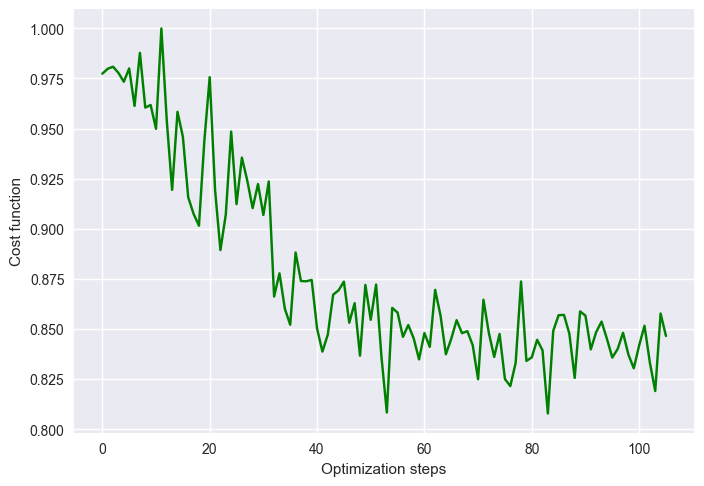

In [23]:
vqlssvm.train(xSubset, ySubset, quantumSimulation=True, verbose=True, iterations = 200)

vqlssvm.plotCost()

In [25]:
print("Predictions: ", vqlssvm.predict(xTest))
print("Accuracy: ", vqlssvm.accuracy(xTest, yTest))
# add data normalization
# print cost and iterations
# condition number


Predictions:  [ 0.10090606+0.j  0.07241167+0.j  0.07564243+0.j -0.08657522+0.j
 -0.1037169 +0.j -0.10881782+0.j -0.12966083+0.j  0.05278866+0.j
 -0.12685054+0.j -0.11720855+0.j -0.12444505+0.j -0.0868663 +0.j
  0.064593  +0.j -0.15466799+0.j  0.0710143 +0.j -0.12014152+0.j
  0.0650525 +0.j  0.07645541+0.j -0.0938887 +0.j -0.10612125+0.j
  0.06656803+0.j  0.04348794+0.j -0.09604657+0.j -0.09693875+0.j
  0.05069655+0.j -0.15545753+0.j -0.11593164+0.j  0.0503397 +0.j
 -0.09598081+0.j  0.09373869+0.j -0.10028212+0.j -0.0960979 +0.j
  0.04608972+0.j -0.11427558+0.j  0.04170472+0.j -0.12064334+0.j
  0.0664766 +0.j  0.03750047+0.j -0.11009137+0.j -0.13631852+0.j
 -0.10672571+0.j -0.09232407+0.j -0.10727885+0.j  0.04221102+0.j
 -0.11482873+0.j -0.12304883+0.j  0.04521312+0.j -0.0854723 +0.j
  0.05821854+0.j -0.09795024+0.j -0.08852573+0.j -0.08770716+0.j
 -0.11355181+0.j -0.08799488+0.j -0.07960415+0.j  0.06479266+0.j
 -0.10138503+0.j  0.02836589+0.j -0.12728323+0.j  0.0634678 +0.j
  0.0537823